<a href="https://colab.research.google.com/github/IgorMatias04/AulaIA08/blob/main/AulaIA_08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
cancer_mama = load_breast_cancer()
X = pd.DataFrame(cancer_mama.data, columns=cancer_mama.feature_names)
X = X[['mean area', 'mean compactness']]
X
y = pd.Categorical.from_codes(cancer_mama.target, cancer_mama.target_names)
y = pd.get_dummies(y, drop_first=True)
y

,benign
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

array([[42, 13],
       [ 9, 79]])

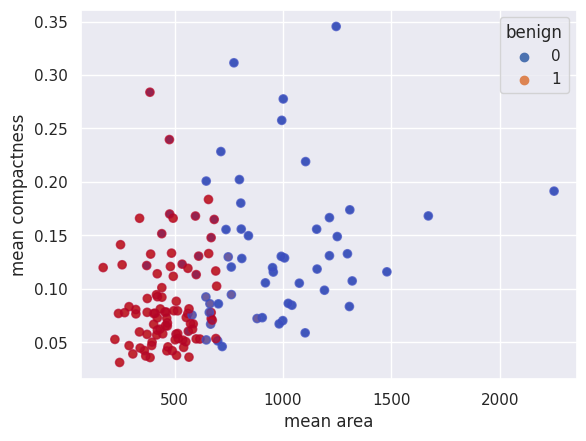

In [6]:
sns.scatterplot(
x='mean area',
y='mean compactness',
hue='benign',
data=X_test.join(y_test, how='outer')
)
plt.scatter(
X_test['mean area'],
X_test['mean compactness'],
c=y_pred,
cmap='coolwarm',
alpha=0.7
)
confusion_matrix(y_test, y_pred)